In [1]:
import tensorflow as tf

In [3]:
tf.__version__

'2.4.1'

In [2]:
import pandas as pd
import os
import numpy as np
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
data=[]
labels=[]


happy-1
scare-2
sad-3
angry-4
neutral-5

In [9]:

for filename in os.listdir("happy pp"):
    frame="happy pp/"+filename
    
    if frame=='happy pp/.DS_Store':
        pass
    else:
    #print(filename)
        i=Image.open("happy pp/"+filename)
        im=np.asarray(i)
        data.append(im)
        labels.append(filename+"_1")
        

In [10]:
len(data)

5433

In [11]:
len(labels)

5433

In [12]:
data=np.asarray(data)

In [13]:
data=data[:,:,:,-1]

In [14]:
data.shape

(5433, 64, 64)

In [15]:
emotion=[]
for i in range(len(labels)):
    emotion.append(labels[i][-1])

In [16]:
lis=[]
for i in range(len(data)):
    d=data[i].flatten()
    lis.append(d)
    

In [17]:
data

array([[[ 30,  30,  30, ...,  27,  28,  31],
        [ 30,  30,  30, ...,  27,  27,  28],
        [ 30,  30,  30, ...,  28,  27,  26],
        ...,
        [ 31,  31,  31, ...,  32,  32,  32],
        [ 31,  31,  31, ...,  32,  32,  32],
        [ 31,  31,  31, ...,  32,  32,  32]],

       [[176, 154, 142, ...,  99,  97,  87],
        [179, 156, 135, ...,  92,  90,  74],
        [182, 160, 128, ...,  88,  86,  84],
        ...,
        [158, 141, 125, ..., 102,  36, 122],
        [137, 136, 135, ..., 115,  70, 140],
        [120, 152, 165, ..., 111,  96, 153]],

       [[113,  93,  69, ...,  19,   0,   5],
        [ 96, 105,  61, ...,  58,  43,   2],
        [100,  93,  79, ...,  48,  38,  52],
        ...,
        [  0,   3,   0, ...,   0,  13,   0],
        [  0,   2,   0, ...,   0,   8,   0],
        [  4,   2,   0, ...,   7,   0,   2]],

       ...,

       [[169, 164, 156, ..., 175, 175, 174],
        [172, 169, 165, ..., 181, 184, 185],
        [173, 173, 172, ..., 182, 188, 188

In [18]:
df = pd.DataFrame(list(zip(lis, emotion)), 
               columns =['Image', 'Label'])

In [19]:
df.head()

,Image,Label
0,"[30, 30, 30, 30, 30, 30, 30, 30, 33, 33, 33, 3...",5
1,"[176, 154, 142, 151, 107, 93, 117, 169, 153, 1...",5
2,"[113, 93, 69, 90, 39, 118, 172, 117, 68, 0, 46...",5
3,"[226, 231, 222, 233, 216, 143, 69, 18, 13, 23,...",5
4,"[38, 35, 19, 33, 21, 63, 44, 56, 68, 80, 83, 9...",5


In [20]:
from sklearn.utils import shuffle
df = shuffle(df)

In [21]:
df.head()

,Image,Label
4289,"[0, 17, 17, 43, 48, 70, 71, 94, 131, 138, 155,...",2
4448,"[237, 232, 216, 190, 154, 159, 171, 127, 90, 1...",1
2288,"[242, 244, 225, 227, 209, 213, 180, 160, 154, ...",3
394,"[44, 36, 58, 41, 51, 34, 22, 14, 35, 40, 58, 8...",5
4439,"[15, 34, 12, 22, 79, 59, 52, 46, 59, 72, 94, 1...",1


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
trainx,testx,trainy,testy=train_test_split(df["Image"], df["Label"], train_size=0.8,test_size=0.2)

In [24]:
trainx.shape

(4346,)

In [25]:
!pip install keras-tuner

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [27]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(64,64,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(5, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [28]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [29]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Emot")

In [30]:
trainx=np.asarray(trainx)
trainy=np.asarray(trainy)

In [ ]:
tr

In [44]:
traindata.shape

(4346, 64, 64, 1)

In [45]:
trainy.shape

(4346,)

In [46]:
trainy

array(['3', '4', '1', ..., '2', '2', '2'], dtype=object)

In [47]:
trainy = np.asarray(trainy).astype('float32')

In [48]:
tuner_search.search(traindata,trainy,epochs=3,validation_split=0.1)

Trial 7 Complete [00h 05m 21s]
val_accuracy: 0.2344827651977539

Best val_accuracy So Far: 0.5126436948776245
Total elapsed time: 00h 29m 28s
INFO:tensorflow:Oracle triggered exit


In [49]:
model=tuner_search.get_best_models(num_models=1)[0]

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 112)       1120      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 48)        48432     
_________________________________________________________________
flatten (Flatten)            (None, 172800)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11059264  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 11,109,466
Trainable params: 11,109,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(traindata, trainy, epochs=50, validation_split=0.1, initial_epoch=3)

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 112)       1120      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 48)        48432     
_________________________________________________________________
flatten (Flatten)            (None, 172800)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11059264  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 11,109,466
Trainable params: 11,109,466
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.save("keras_model.h5")

# Above

In [52]:
trainx[0].shape

(4096,)

In [53]:
type(trainx[0])

numpy.ndarray

In [71]:
trainx[0]

array([211, 215, 199, ..., 255, 255, 255], dtype=uint8)

In [73]:
a=trainx[0].reshape(64,64)

In [74]:
a.shape

(64, 64)

In [58]:
a=np.asarray(trainx)

In [59]:
type(a)

numpy.ndarray

In [56]:
type(trainy)

pandas.core.series.Series

In [57]:
trainy

4525    4
1143    2
431     1
1641    2
3635    4
       ..
1357    2
4010    4
301     1
2982    3
4811    5
Name: Label, Length: 4346, dtype: object

In [63]:
from keras.models import Sequential

In [65]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [125]:
traindata[0].shape

(64, 64, 1)

In [132]:
model = Sequential()


input_shape = (64,64,1)


model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

## (15, 15) --->  30
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [127]:
trainy

array([4, 2, 1, ..., 1, 3, 5], dtype=uint8)

In [128]:
from keras.utils import to_categorical
y_new = to_categorical(trainy, num_classes=6)

In [130]:
y_new

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [133]:
model.fit(traindata, y_new, epochs=5, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/5
55/55 [==============================] - 283s 5s/step - loss: 4.4990 - accuracy: 0.2300 - val_loss: 11.3417 - val_accuracy: 0.1954
Epoch 2/5
55/55 [==============================] - 292s 5s/step - loss: 2.1957 - accuracy: 0.2989 - val_loss: 1.9691 - val_accuracy: 0.2621
Epoch 3/5
55/55 [==============================] - 340s 6s/step - loss: 2.0151 - accuracy: 0.3210 - val_loss: 1.7376 - val_accuracy: 0.2989
Epoch 4/5
55/55 [==============================] - 321s 6s/step - loss: 1.9526 - accuracy: 0.3475 - val_loss: 1.8101 - val_accuracy: 0.2310
Epoch 5/5
55/55 [==============================] - 443s 8s/step - loss: 1.7196 - accuracy: 0.3791 - val_loss: 1.7320 - val_accuracy: 0.3034


In [135]:
model.fit(traindata, y_new, epochs=50, validation_split=0.2, initial_epoch=5)

Epoch 6/50
109/109 [==============================] - 355s 3s/step - loss: 1.9770 - accuracy: 0.3631 - val_loss: 2.3518 - val_accuracy: 0.2276
Epoch 7/50
109/109 [==============================] - 353s 3s/step - loss: 1.6099 - accuracy: 0.4108 - val_loss: 1.5135 - val_accuracy: 0.3897
Epoch 8/50
109/109 [==============================] - 368s 3s/step - loss: 1.3907 - accuracy: 0.4727 - val_loss: 1.5155 - val_accuracy: 0.4069
Epoch 9/50
109/109 [==============================] - 285s 3s/step - loss: 1.3215 - accuracy: 0.4994 - val_loss: 1.7655 - val_accuracy: 0.3828
Epoch 10/50
109/109 [==============================] - 274s 3s/step - loss: 1.2349 - accuracy: 0.5291 - val_loss: 1.4511 - val_accuracy: 0.4264
Epoch 11/50
109/109 [==============================] - 272s 2s/step - loss: 1.1427 - accuracy: 0.5688 - val_loss: 1.8633 - val_accuracy: 0.3494
Epoch 12/50
109/109 [==============================] - 291s 3s/step - loss: 1.0689 - accuracy: 0.5932 - val_loss: 1.7281 - val_accuracy: 0.3

In [70]:
trainx[0].shape

(4096,)

In [ ]:
x = np.asarray(x).astype('float32')

In [31]:
traindata=[]
for i in range (len(trainx)):
    trx=trainx[i].reshape((64,64))
    traindata.append(trx)
    
    

In [32]:
traindata=np.asarray(traindata)

In [33]:
traindata.shape

(4346, 64, 64)

In [34]:
traindata

array([[[ 34,  38,  31, ...,  24,  24,  24],
        [ 26,  30,  25, ...,  20,  20,  20],
        [ 28,  30,  25, ...,  22,  22,  22],
        ...,
        [ 24,  79, 165, ...,  35,  34,  34],
        [ 73, 177, 208, ...,  33,  32,  31],
        [156, 205, 165, ...,  33,  32,  32]],

       [[ 36,  32,  25, ..., 186, 186, 186],
        [ 37,  34,  29, ..., 189, 188, 188],
        [ 38,  38,  36, ..., 188, 187, 186],
        ...,
        [ 76,  78,  81, ...,   3,   3,   3],
        [ 74,  77,  81, ...,   6,   6,   6],
        [ 71,  75,  80, ...,  12,  12,  12]],

       [[ 43,  34,  40, ..., 181, 185, 193],
        [ 52,  38,  38, ..., 184, 186, 193],
        [ 53,  36,  30, ..., 185, 187, 193],
        ...,
        [183, 157, 161, ..., 200, 200, 201],
        [186, 160, 168, ..., 204, 207, 203],
        [181, 172, 178, ..., 208, 213, 207]],

       ...,

       [[ 64,  57,  43, ...,  31,  35,  31],
        [ 63,  53,  36, ...,  20,  31,  38],
        [ 61,  45,  25, ...,   7,  25,  45

In [35]:
trainy

array(['3', '4', '1', ..., '2', '2', '2'], dtype=object)

In [87]:
trainx

array([array([211, 215, 199, ..., 255, 255, 255], dtype=uint8),
       array([191, 199, 208, ...,  17,  62, 122], dtype=uint8),
       array([ 66,  43,  72, ..., 227, 138, 149], dtype=uint8), ...,
       array([247, 247, 247, ..., 171, 167, 160], dtype=uint8),
       array([ 16,  13,  10, ..., 134, 131, 130], dtype=uint8),
       array([ 92,  98, 107, ...,  16,  11,   0], dtype=uint8)],
      dtype=object)

In [88]:
traindata

array([[[211, 215, 199, ..., 158, 184, 190],
        [219, 214, 207, ..., 184, 204, 211],
        [217, 203, 203, ..., 204, 212, 220],
        ...,
        [255, 253, 249, ..., 253, 255, 255],
        [255, 254, 252, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[191, 199, 208, ..., 244, 255, 247],
        [192, 194, 194, ..., 247, 254, 249],
        [199, 204, 206, ..., 251, 251, 252],
        ...,
        [175, 176, 175, ..., 170, 183, 188],
        [173, 170, 167, ...,  78, 134, 187],
        [175, 168, 161, ...,  17,  62, 122]],

       [[ 66,  43,  72, ..., 255, 249, 246],
        [ 65,  52,  72, ..., 251, 244, 247],
        [ 72,  68,  67, ..., 249, 241, 252],
        ...,
        [154, 138, 130, ..., 211, 251, 137],
        [139, 139, 153, ..., 251, 217,  98],
        [116, 121, 147, ..., 227, 138, 149]],

       ...,

       [[247, 247, 247, ...,  38,  27,  61],
        [247, 247, 247, ...,  41,  30,  49],
        [247, 247, 247, ...,  41,  28,  28

TypeError: Invalid shape (64, 64, 1) for image data

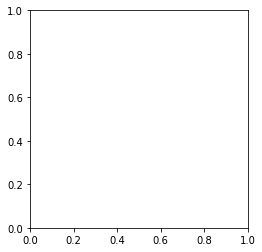

In [94]:
plt.imshow(traindata[0])

In [96]:
trainx=trainx/255.0

In [112]:
trainx.shape

(4346,)

In [113]:
trainx

array([array([0.82745098, 0.84313725, 0.78039216, ..., 1.        , 1.        ,
       1.        ]),
       array([0.74901961, 0.78039216, 0.81568627, ..., 0.06666667, 0.24313725,
       0.47843137]),
       array([0.25882353, 0.16862745, 0.28235294, ..., 0.89019608, 0.54117647,
       0.58431373]),
       ...,
       array([0.96862745, 0.96862745, 0.96862745, ..., 0.67058824, 0.65490196,
       0.62745098]),
       array([0.0627451 , 0.05098039, 0.03921569, ..., 0.5254902 , 0.51372549,
       0.50980392]),
       array([0.36078431, 0.38431373, 0.41960784, ..., 0.0627451 , 0.04313725,
       0.        ])], dtype=object)

In [114]:
traindata.shape

(4346, 64, 64)

In [115]:
traindata


array([[[0.82745098, 0.84313725, 0.78039216, ..., 0.61960784,
         0.72156863, 0.74509804],
        [0.85882353, 0.83921569, 0.81176471, ..., 0.72156863,
         0.8       , 0.82745098],
        [0.85098039, 0.79607843, 0.79607843, ..., 0.8       ,
         0.83137255, 0.8627451 ],
        ...,
        [1.        , 0.99215686, 0.97647059, ..., 0.99215686,
         1.        , 1.        ],
        [1.        , 0.99607843, 0.98823529, ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       [[0.74901961, 0.78039216, 0.81568627, ..., 0.95686275,
         1.        , 0.96862745],
        [0.75294118, 0.76078431, 0.76078431, ..., 0.96862745,
         0.99607843, 0.97647059],
        [0.78039216, 0.8       , 0.80784314, ..., 0.98431373,
         0.98431373, 0.98823529],
        ...,
        [0.68627451, 0.69019608, 0.68627451, ..., 0.66666667,
         0.71764706, 0.7372549 ],
        [0.6

In [41]:
traindata=traindata.reshape(len(traindata),64,64,1)

In [98]:
type(trainx)

numpy.ndarray

In [102]:
trainy=trainy.astype("uint8")

In [103]:
trainy

array([4, 2, 1, ..., 1, 3, 5], dtype=uint8)

In [118]:
trainy.shape

(4346,)

In [120]:
traindata.shape

(4346, 64, 64, 1)

In [141]:
traindata[-1]

array([[[0.36078431],
        [0.38431373],
        [0.41960784],
        ...,
        [0.35294118],
        [0.34509804],
        [0.32156863]],

       [[0.36078431],
        [0.37647059],
        [0.40784314],
        ...,
        [0.35686275],
        [0.35686275],
        [0.33333333]],

       [[0.36470588],
        [0.36470588],
        [0.38823529],
        ...,
        [0.35686275],
        [0.36078431],
        [0.34117647]],

       ...,

       [[0.39607843],
        [0.38039216],
        [0.37647059],
        ...,
        [0.05490196],
        [0.05098039],
        [0.04313725]],

       [[0.38039216],
        [0.38039216],
        [0.40392157],
        ...,
        [0.05882353],
        [0.04705882],
        [0.01176471]],

       [[0.36862745],
        [0.38823529],
        [0.42745098],
        ...,
        [0.0627451 ],
        [0.04313725],
        [0.        ]]])

In [136]:
model.save('model.h5')

In [148]:
model.predict(traindata[-1])

ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (32, 64, 1)


In [147]:
traindata[-1].shape

(64, 64, 1)

In [37]:
trainx

array([array([34, 38, 31, ..., 33, 32, 32], dtype=uint8),
       array([36, 32, 25, ..., 12, 12, 12], dtype=uint8),
       array([ 43,  34,  40, ..., 208, 213, 207], dtype=uint8), ...,
       array([64, 57, 43, ..., 13, 16, 20], dtype=uint8),
       array([ 0,  5,  9, ..., 22, 21, 13], dtype=uint8),
       array([162, 161, 165, ..., 225, 226, 224], dtype=uint8)],
      dtype=object)

In [42]:
traindata[0].shape

(64, 64, 1)

In [52]:
from keras.models import load_model

In [53]:
model_1 = load_model('model.h5')

In [54]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 64)        1664      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)       204928    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 128)      